<a href="https://www.kaggle.com/code/fall2fire/liver-disease-prediction-catboost-classifier?scriptVersionId=277296334" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About Data 
#### Age: Range: 20 to 80 years.
#### Gender: Male (0) or Female (1).
#### BMI (Body Mass Index): Range: 15 to 40.
#### Alcohol Consumption: Range: 0 to 20 units per week.
#### Smoking: No (0) or Yes (1).
#### Genetic Risk: Low (0), Medium (1), High (2).
#### Physical Activity: Range: 0 to 10 hours per week.
#### Diabetes: No (0) or Yes (1).
#### Hypertension: No (0) or Yes (1).
#### Liver Function Test: Range: 20 to 100.
#### Diagnosis: Binary indicator (0 or 1) of liver disease presence.

In [1]:
#Libaries Required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/predict-liver-disease-1700-records-dataset/Liver_disease_data.csv')

In [3]:
df.shape

(1700, 11)

In [4]:
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


## Feedback
### The dataset seems to be already preprocessed by the dataset author so thats quite good...
### but lets visualize the data

In [5]:
df.isnull().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

In [6]:
df.Diagnosis.value_counts()

Diagnosis
1    936
0    764
Name: count, dtype: int64

# EDA on data

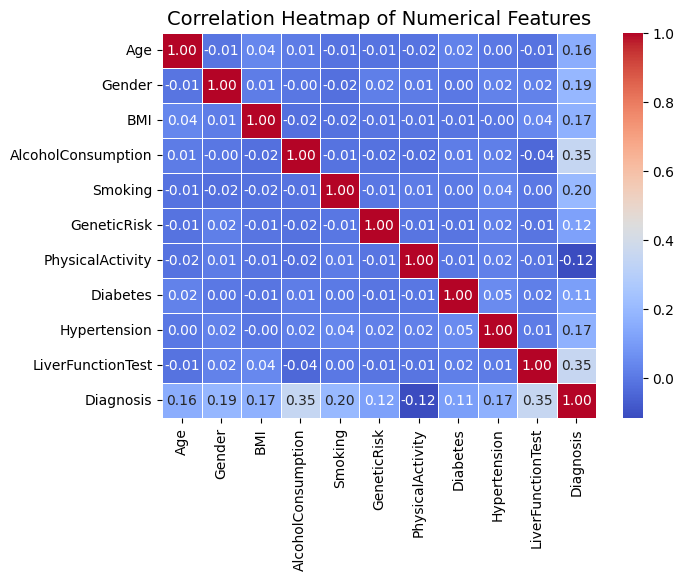

In [7]:
corr_matrix = df.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

# Note: The target column (Diagnosis) is weakly correalated
#### Only AlcoholConsumption has highest correlation among all columns i.e. 0.35

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

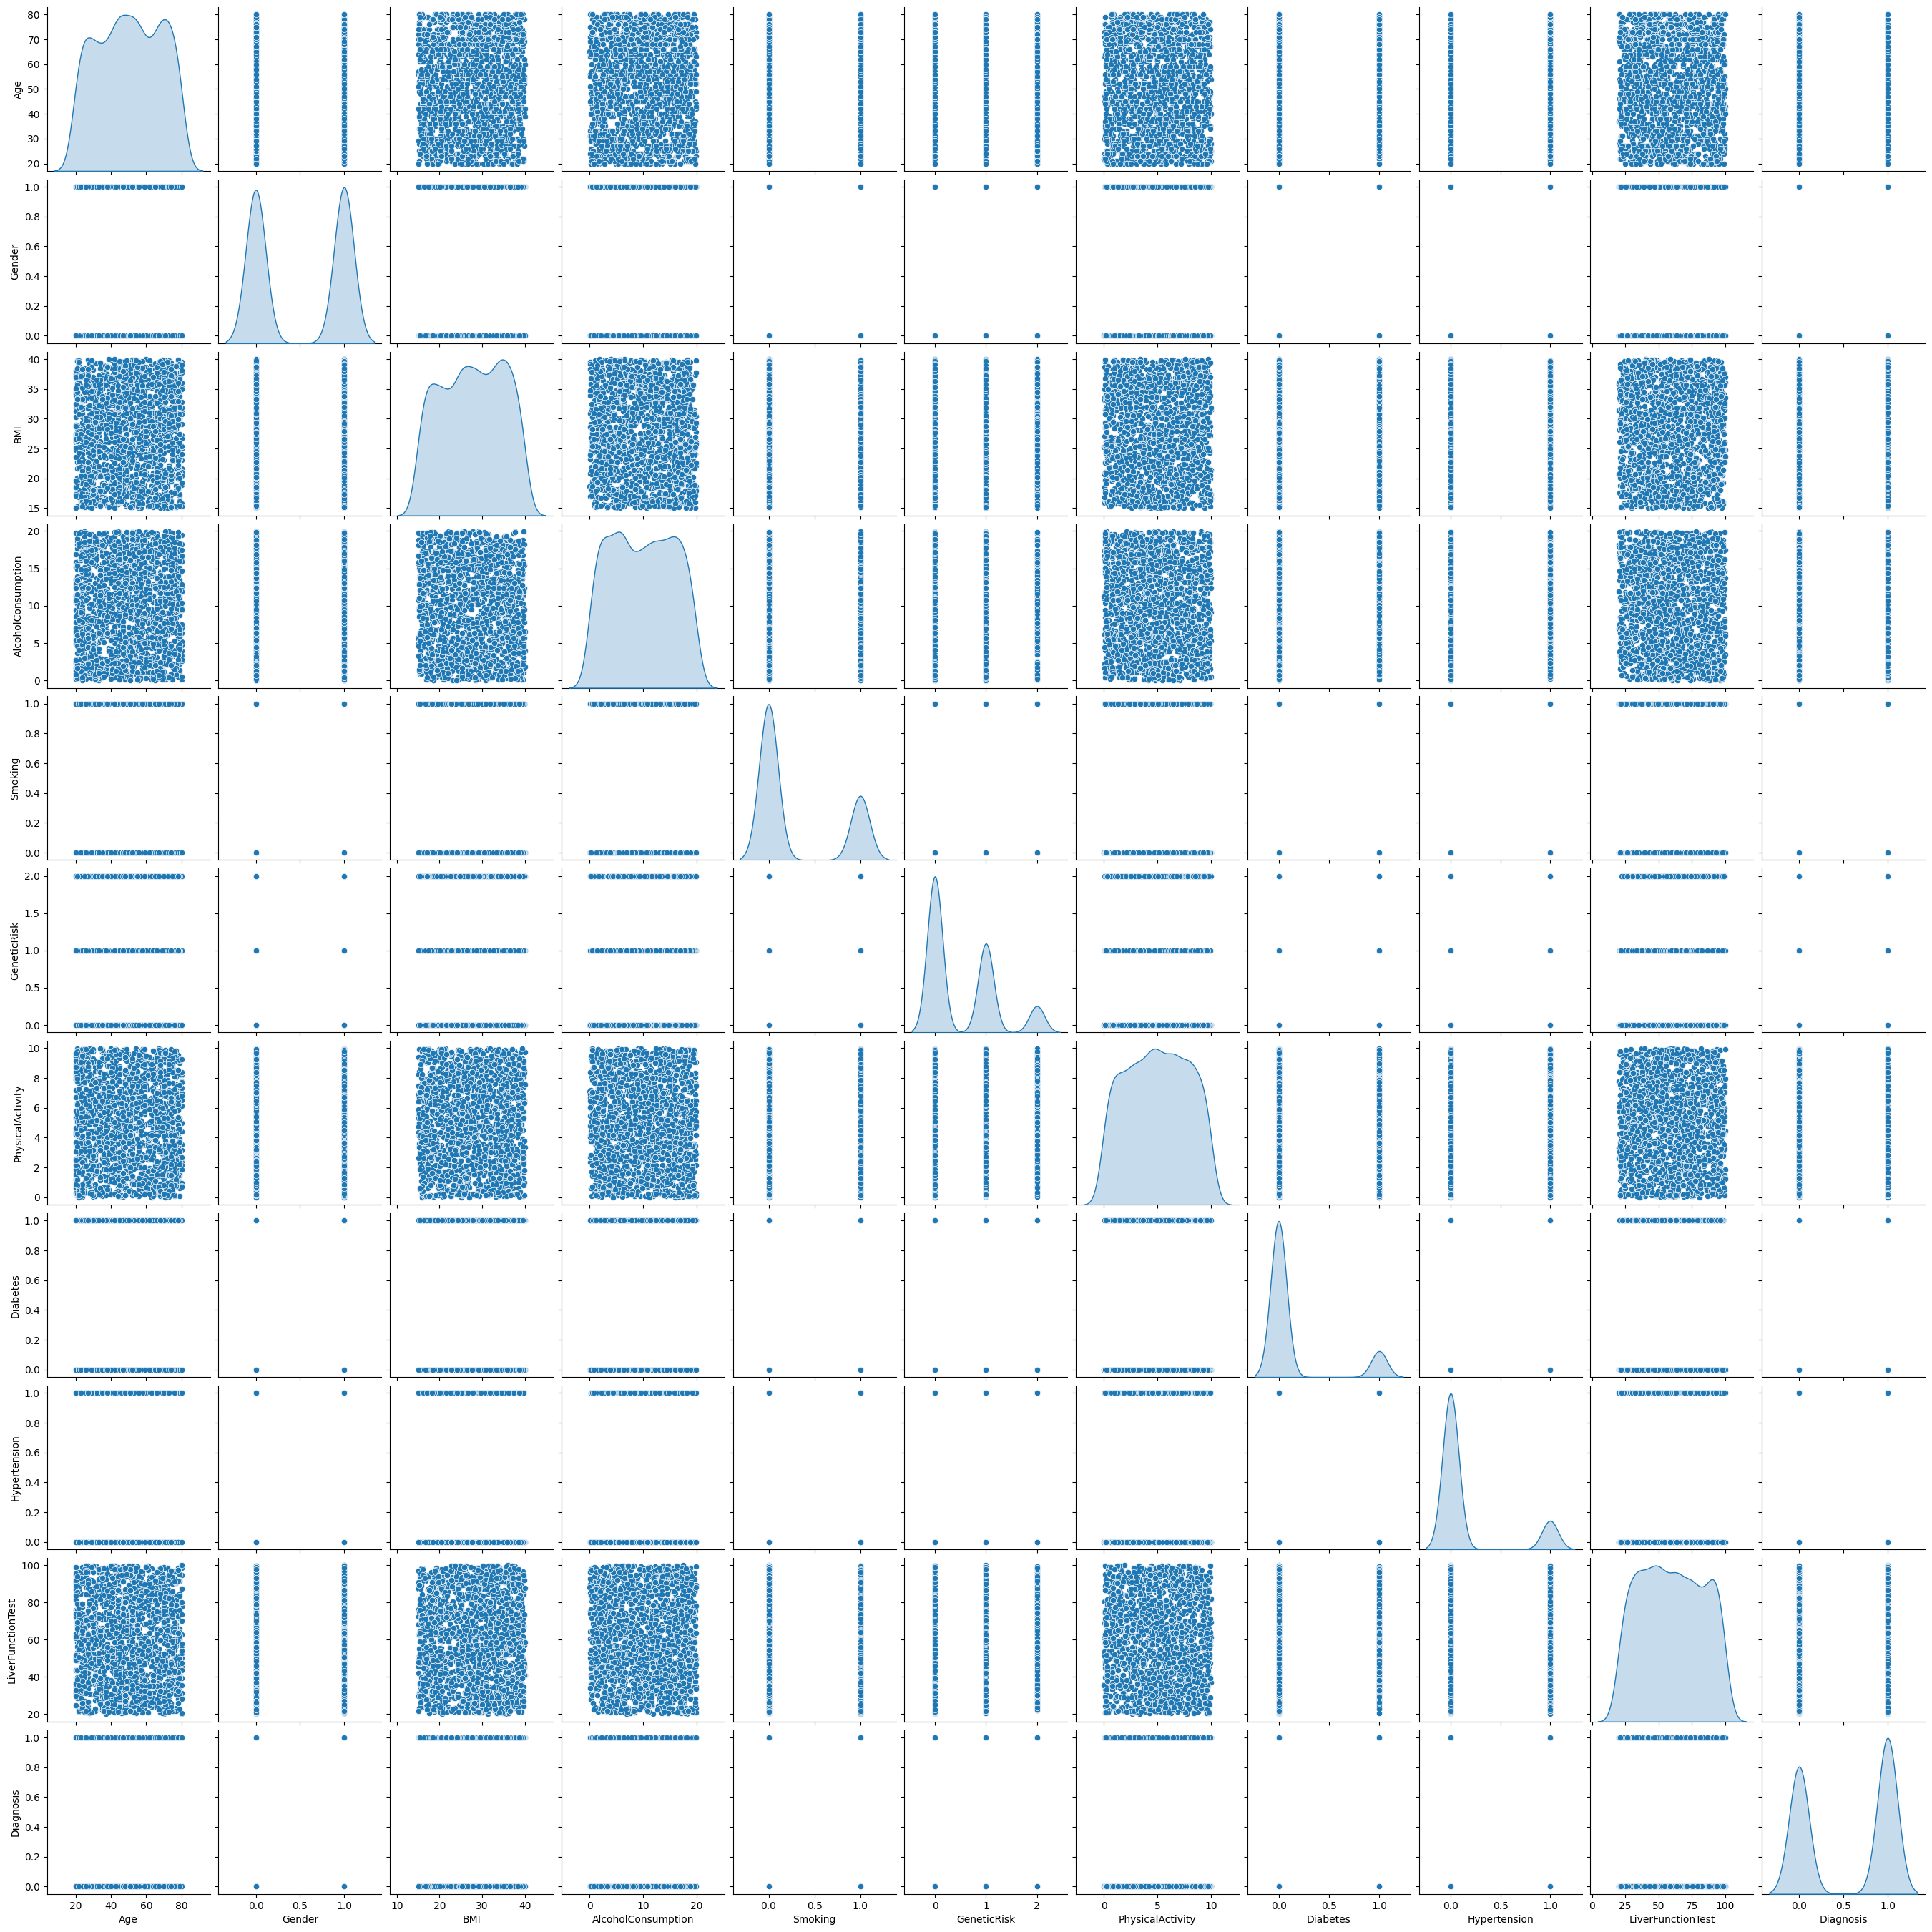

In [8]:
sns.pairplot(df,diag_kind='kde')

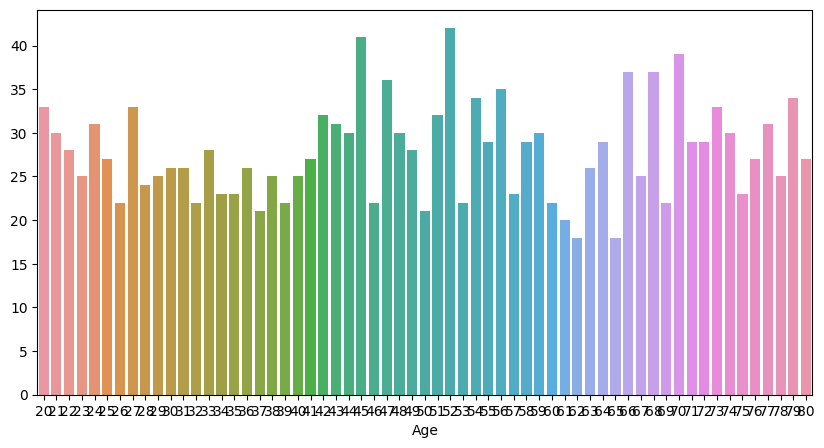

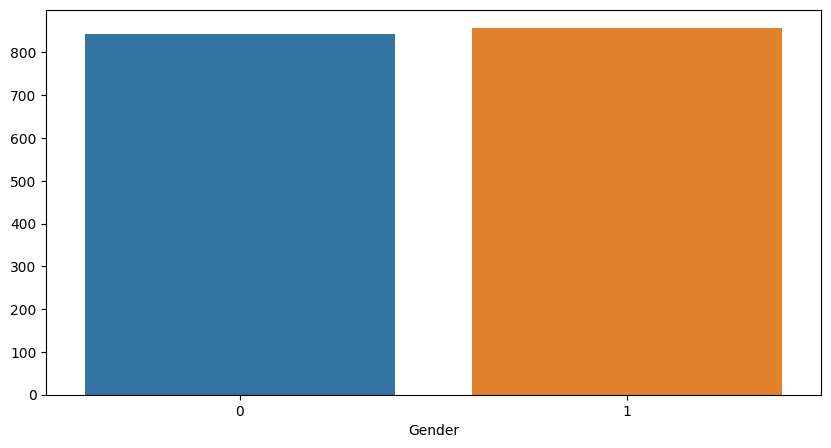

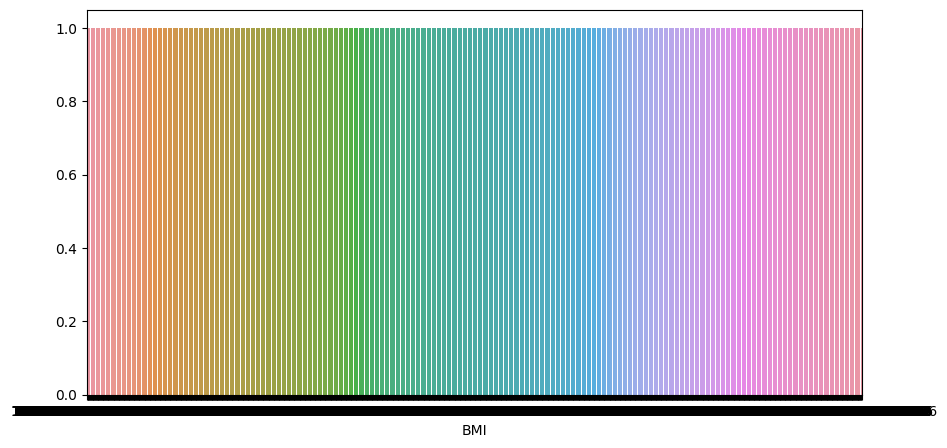

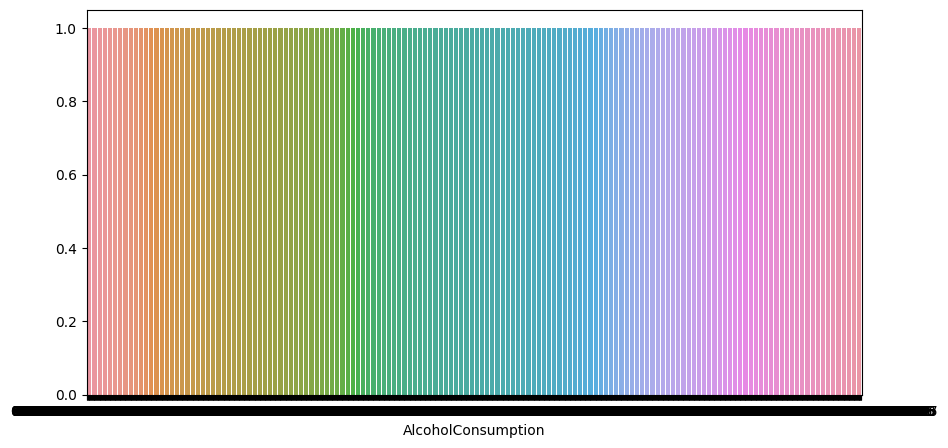

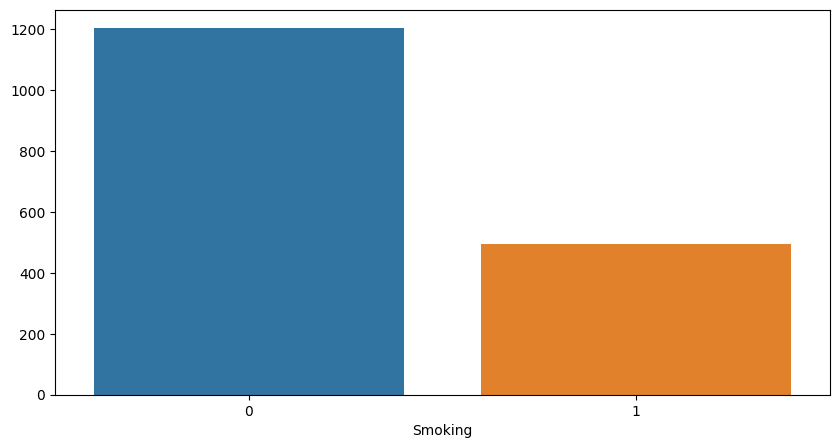

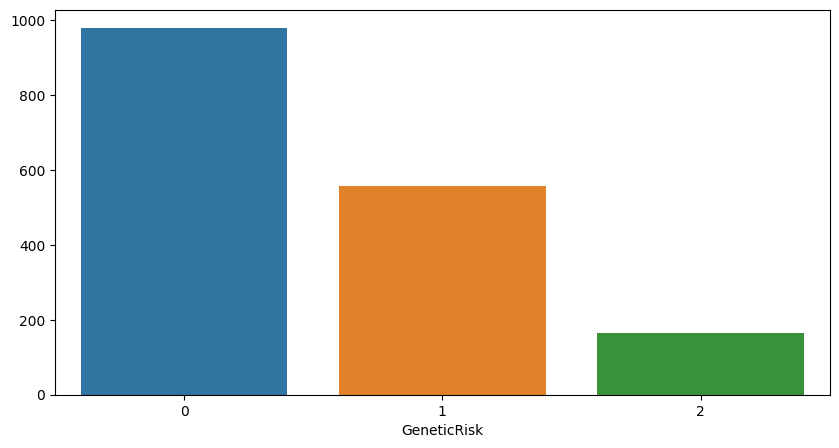

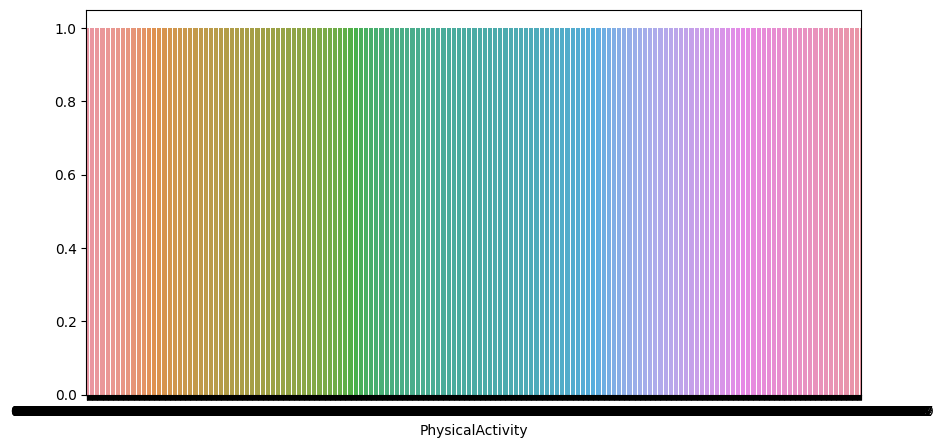

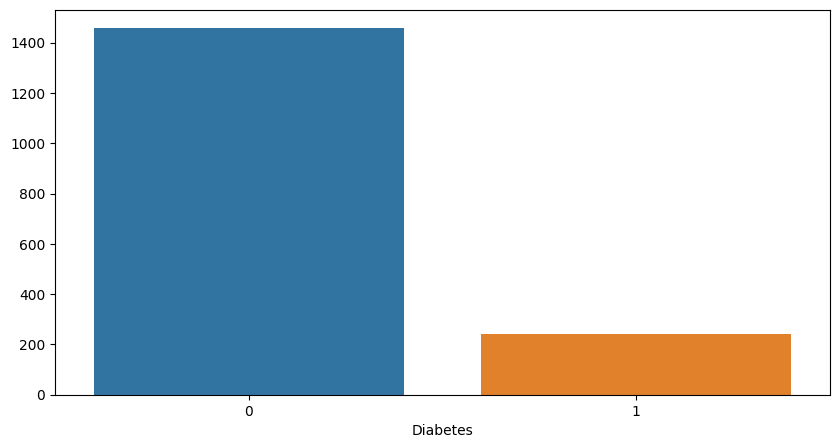

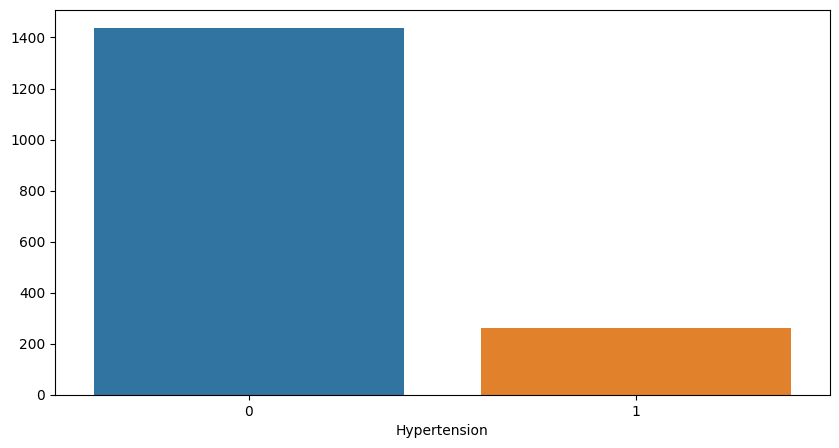

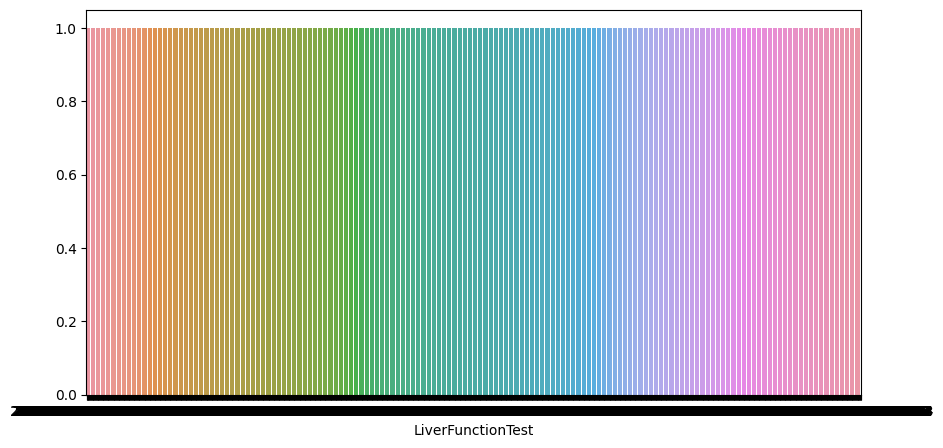

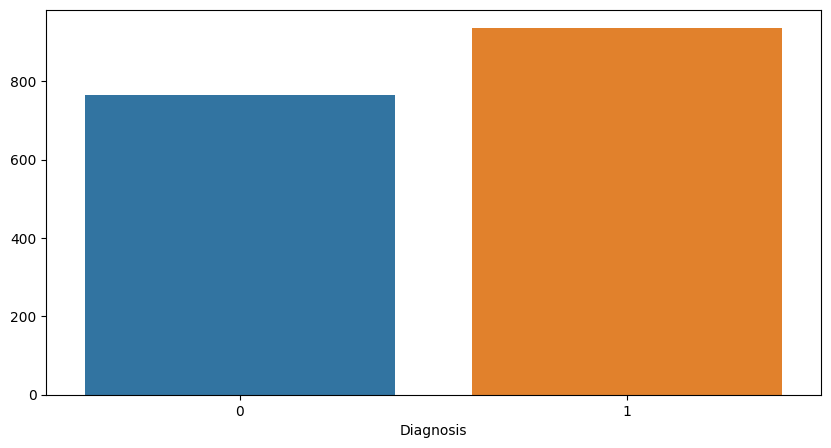

In [9]:
for i in df:
    x=df[i].value_counts()
    plt.figure(figsize=(10,5))
    sns.barplot(x=x.index, y=x.values)
    plt.show()
    

# Observations :-
## Huge class imbalance problem in following columns...
#### Smoking               
#### GeneticRisk           
#### Diabetes              
#### Hypertension

<Axes: >

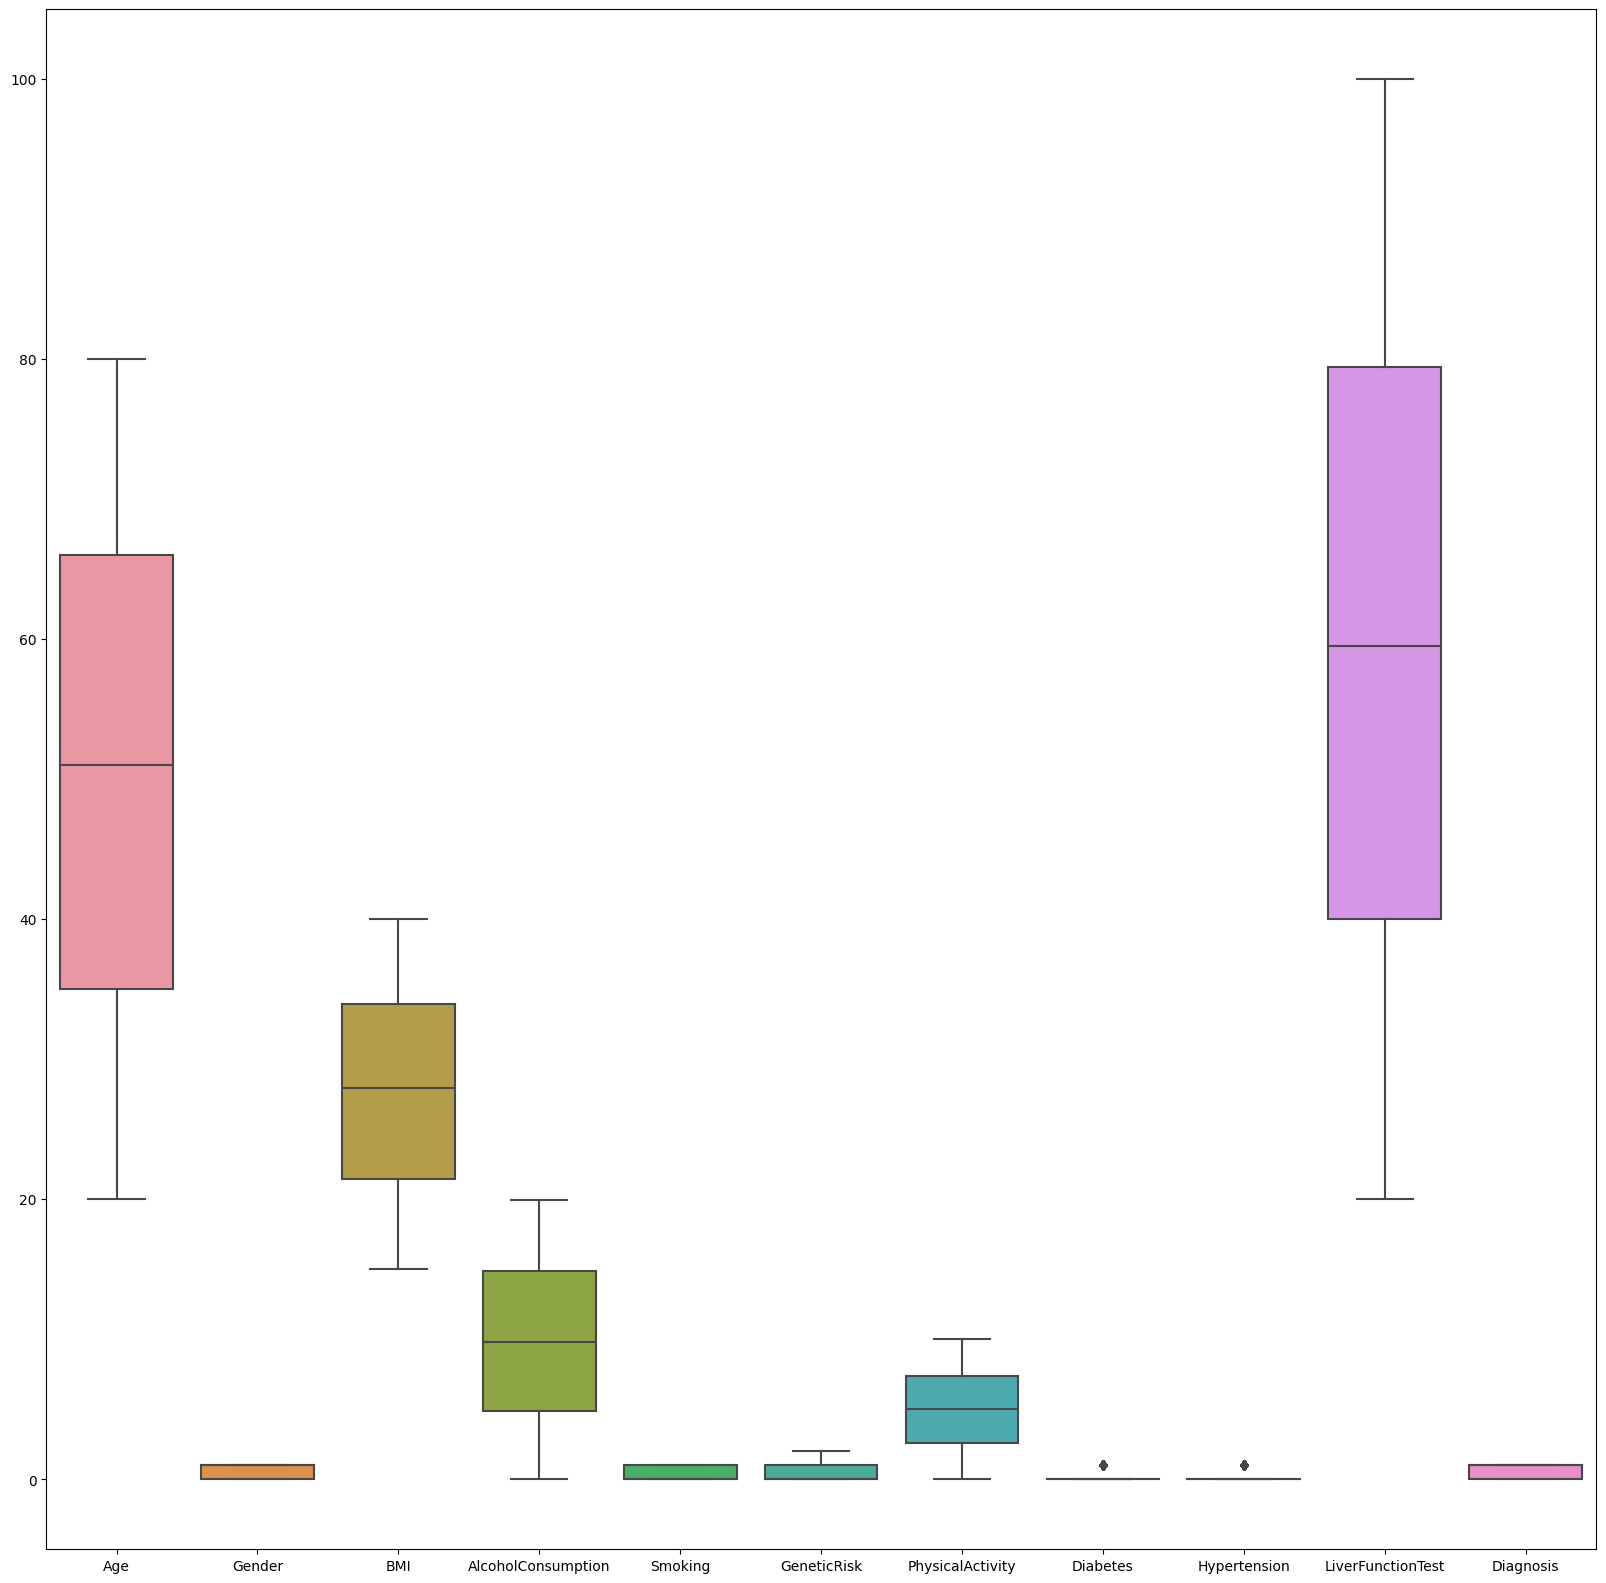

In [10]:
plt.figure(figsize=(20,20))
sns.boxplot(df)

### No outliers detected in BMI, AlcoholConsumption, PhysicalActivity, LiverFunctionTest

# Test Train Split and Predictive Modeling 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Features and target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale numeric data (especially useful in SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## XGBoost
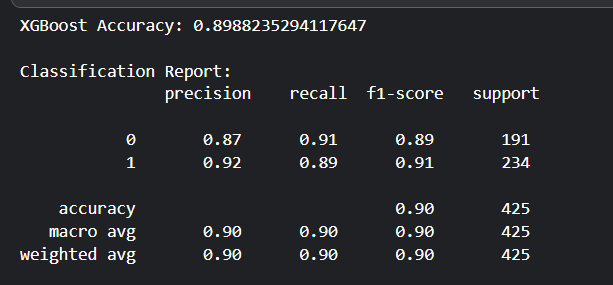
## LightGBM
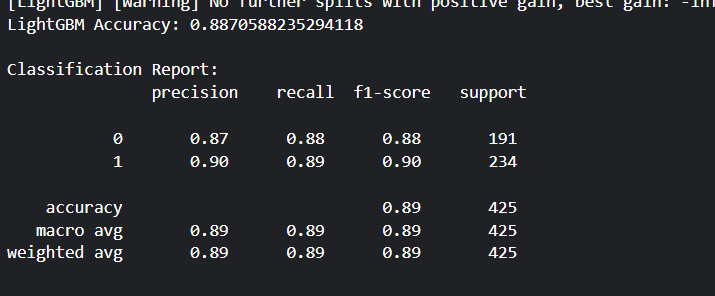

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9058823529411765

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       191
           1       0.93      0.90      0.91       234

    accuracy                           0.91       425
   macro avg       0.90      0.91      0.91       425
weighted avg       0.91      0.91      0.91       425



In [13]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# CatBoost Classifier
cat_model = CatBoostClassifier(
    iterations=300,         # number of trees
    learning_rate=0.05,     # step size
    depth=16,                # max depth of each tree
    loss_function='Logloss',  # for binary classification
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0               
)

# Train
cat_model.fit(X_train_scaled, y_train)

# Predict
y_pred_cat = cat_model.predict(X_test_scaled)

# Evaluate
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification Report (CatBoost):\n", classification_report(y_test, y_pred_cat))


CatBoost Accuracy: 0.908235294117647

Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       191
           1       0.96      0.87      0.91       234

    accuracy                           0.91       425
   macro avg       0.91      0.91      0.91       425
weighted avg       0.91      0.91      0.91       425

